   type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     0      -0.166898         -0.423168     0.284273        2.135486   
1     0      -0.707155         -0.240846     0.146551       -0.975508   
2     0       0.682078         -0.362394     0.559716        0.653961   
3     0      -0.012539         -0.666264     0.008829        0.924371   
4     0      -0.012539         -0.666264     0.008829        0.924371   

   chlorides  free sulfur dioxide  total sulfur dioxide   density        pH  \
0  -0.325213             0.856538              0.805895  2.102214 -1.359590   
1  -0.201104            -0.853151              0.446387 -0.232332  0.508116   
2  -0.170151             0.254413              0.009535  0.134525  0.259089   
3   0.076420             0.921472              0.933848  0.301278 -0.176709   
4   0.076420             0.921472              0.933848  0.301278 -0.176709   

   sulphates   alcohol  quality  
0  -0.547442 -1.418558        6  
1  -0.250349 -0.83

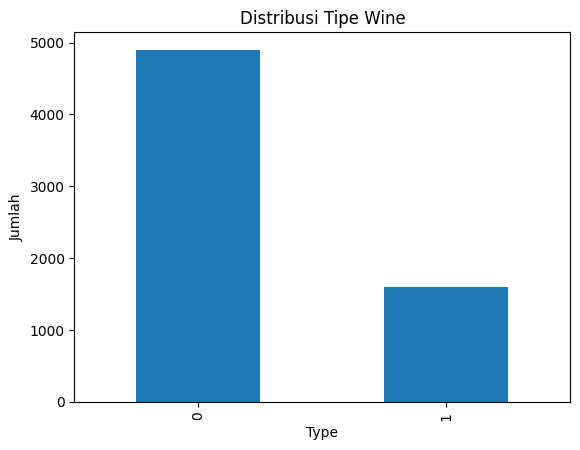

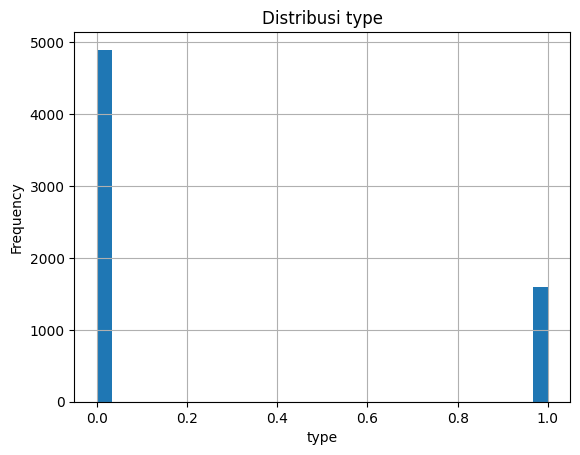

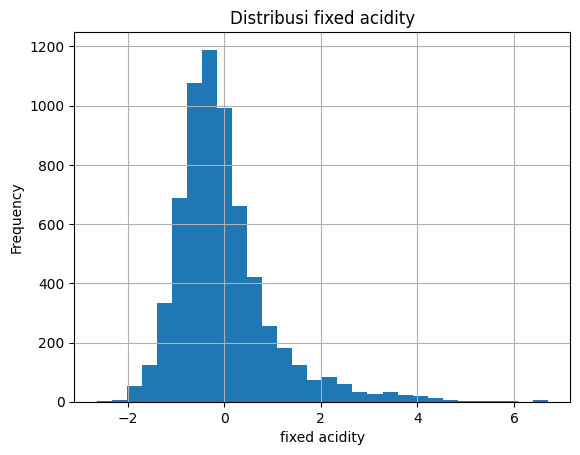

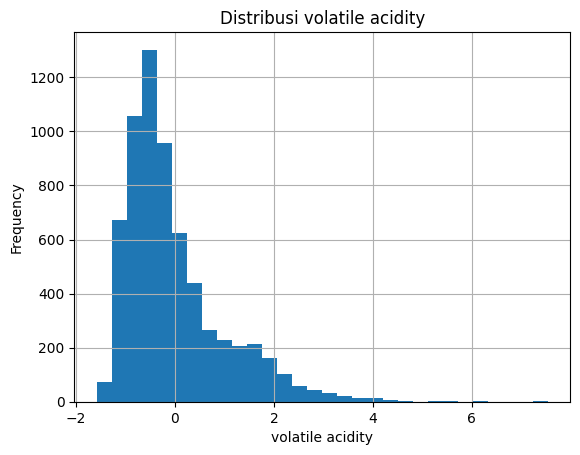

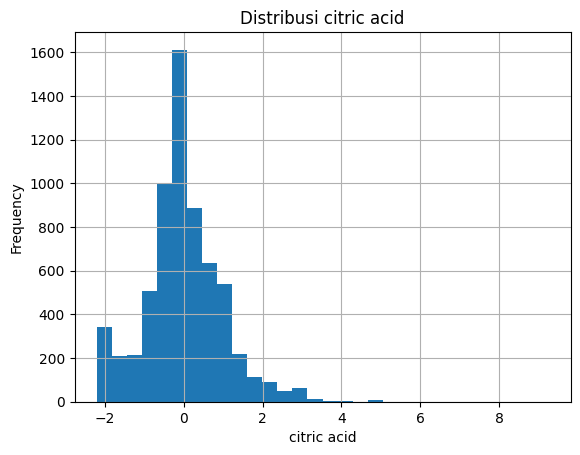

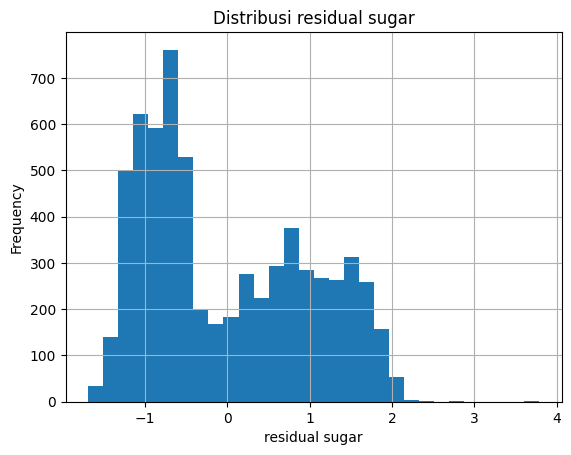

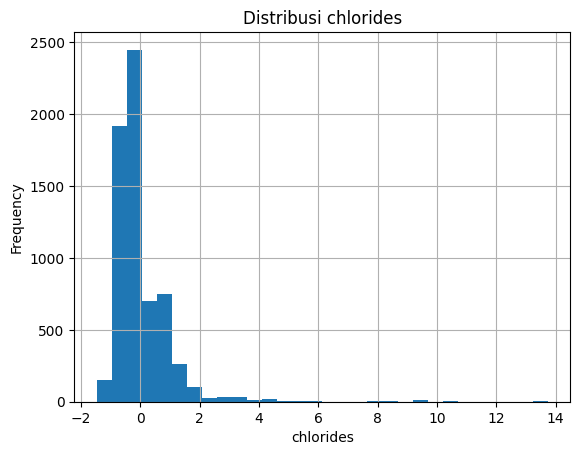

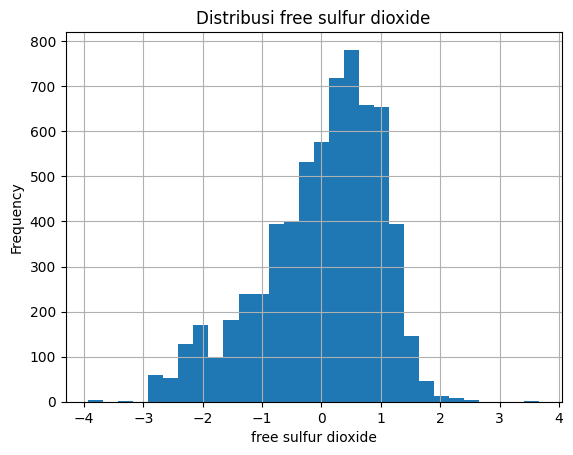

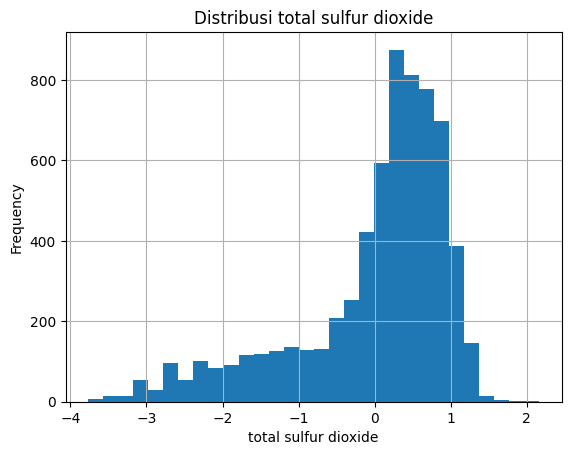

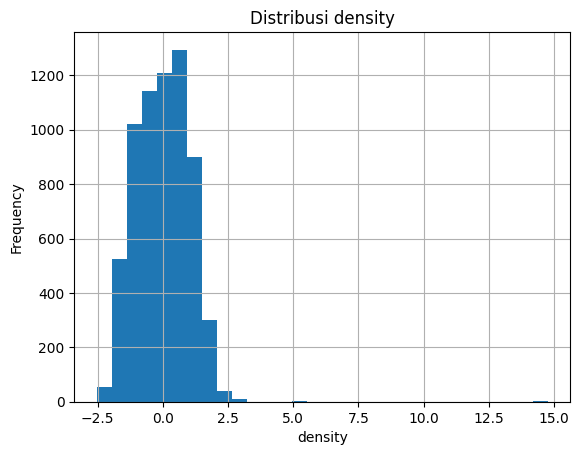

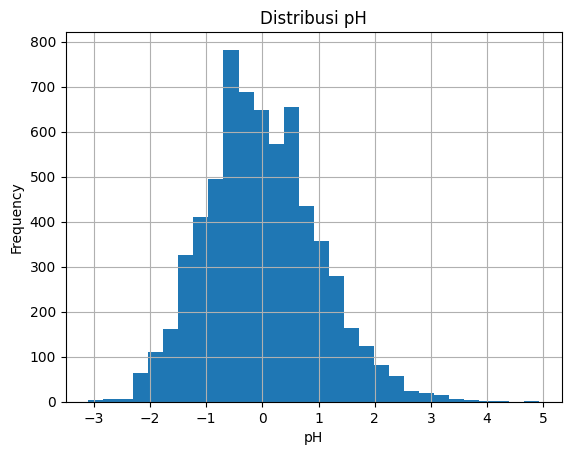

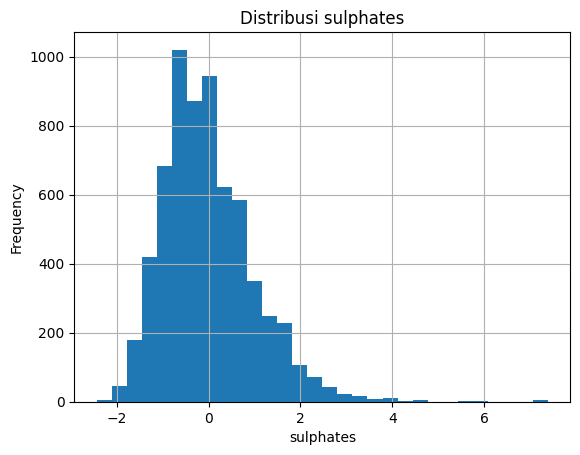

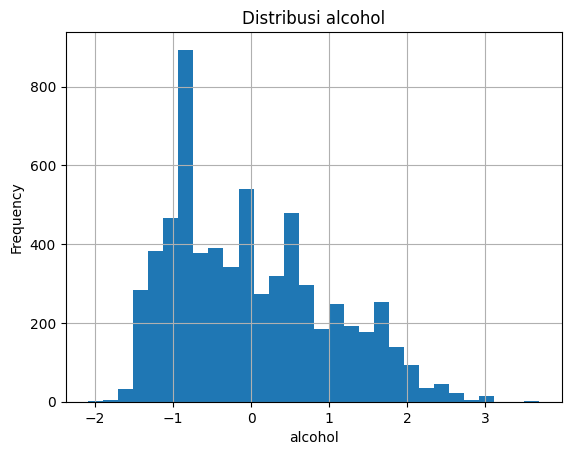

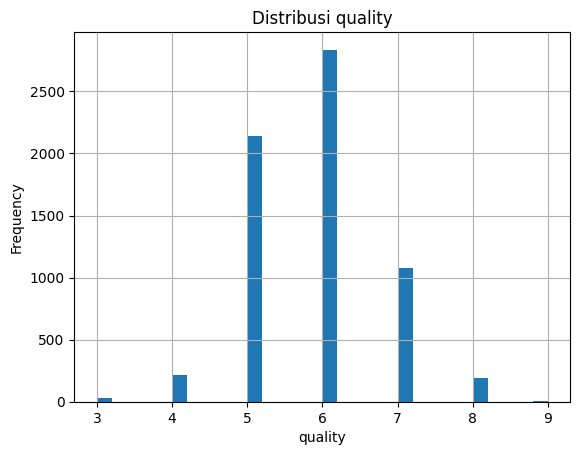

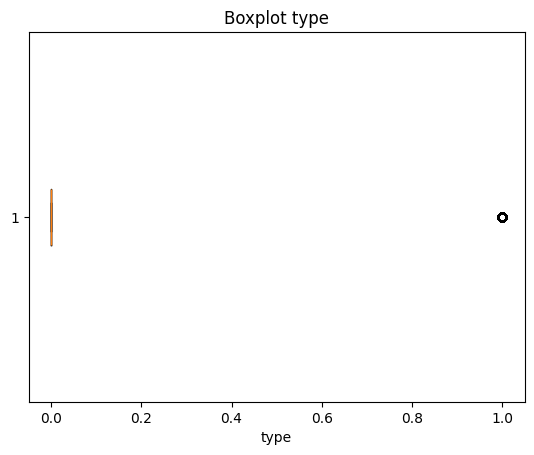

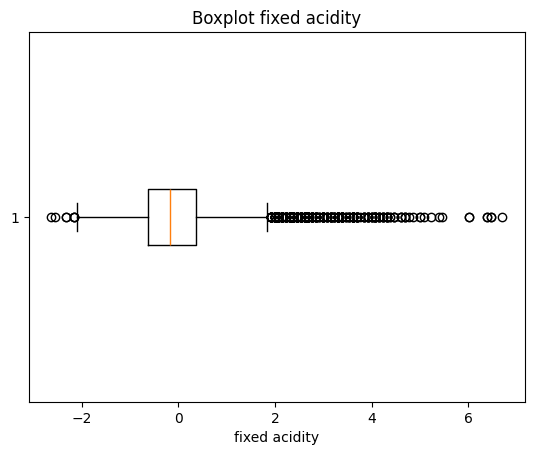

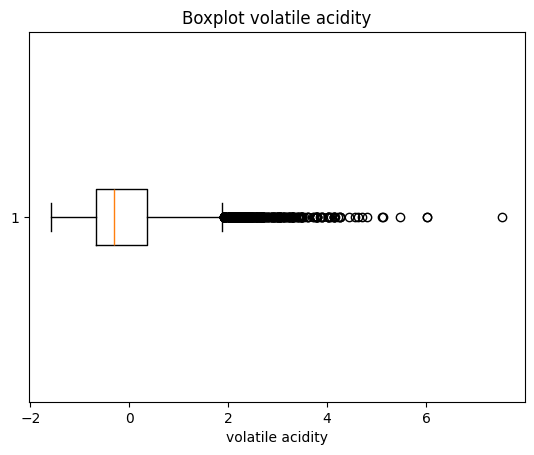

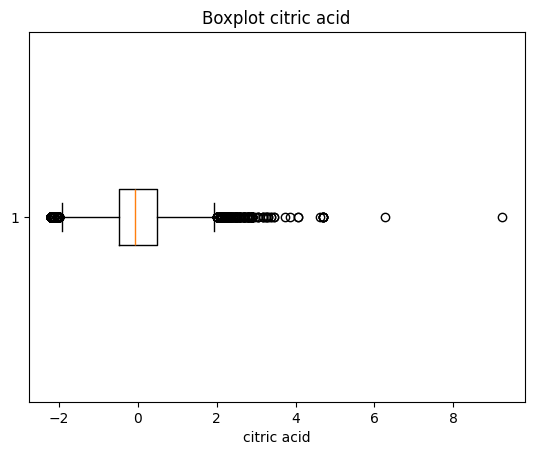

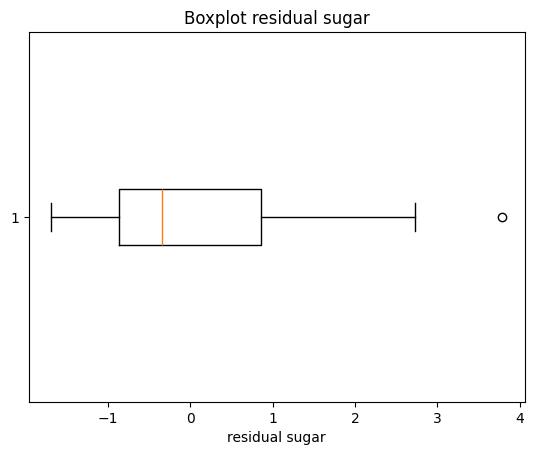

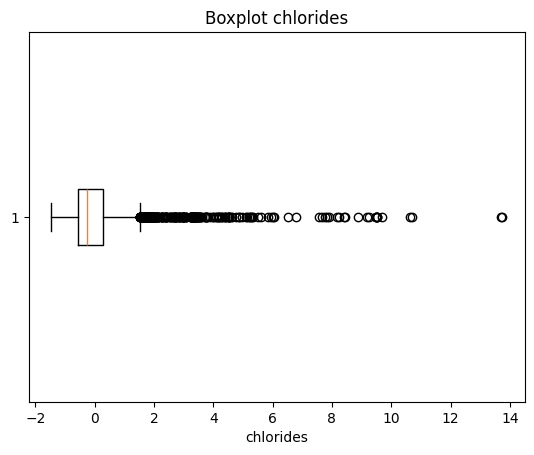

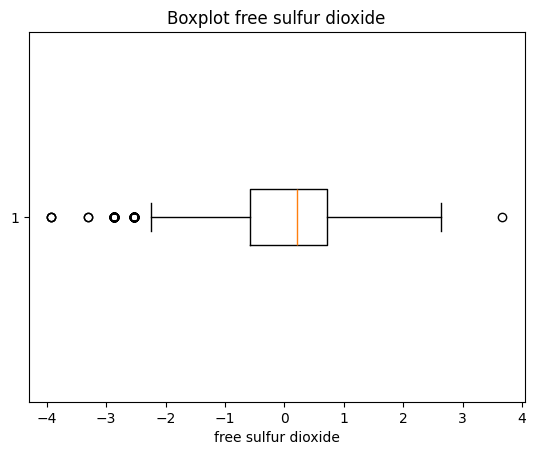

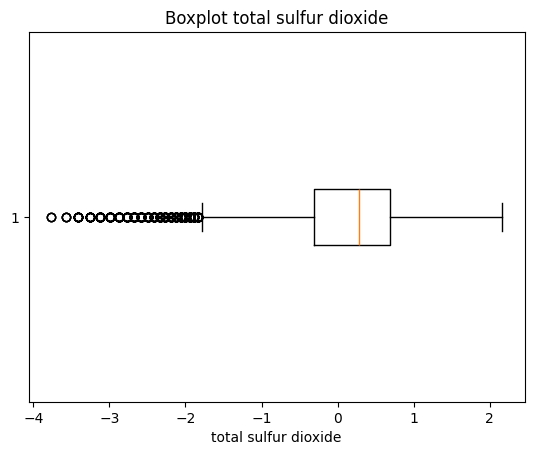

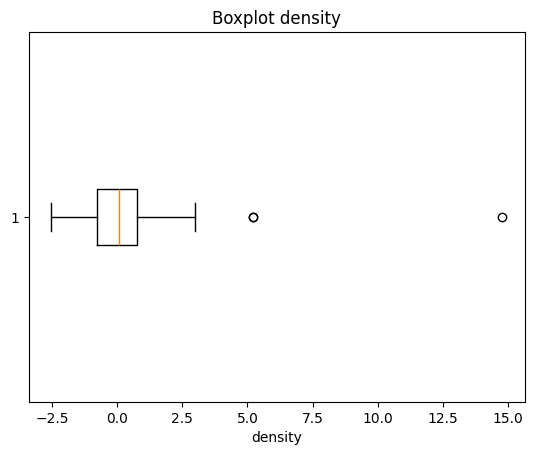

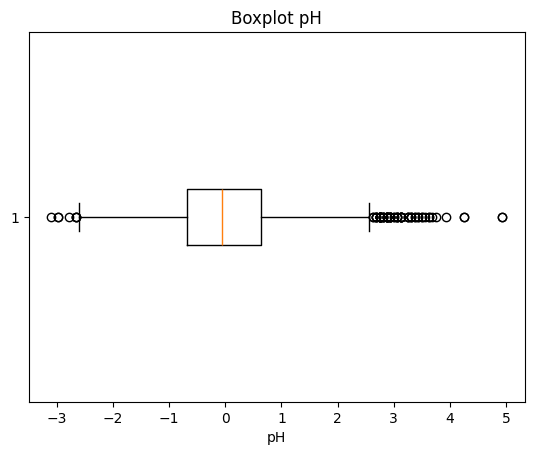

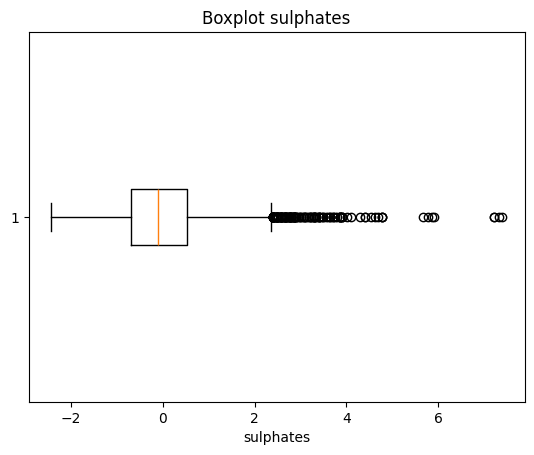

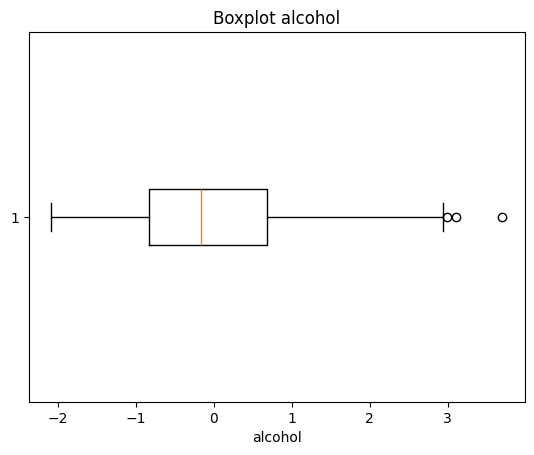

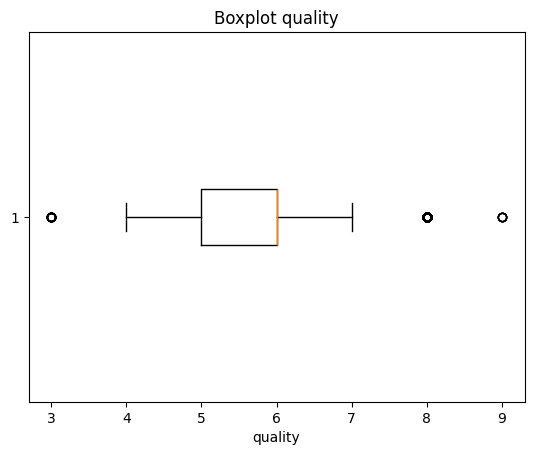

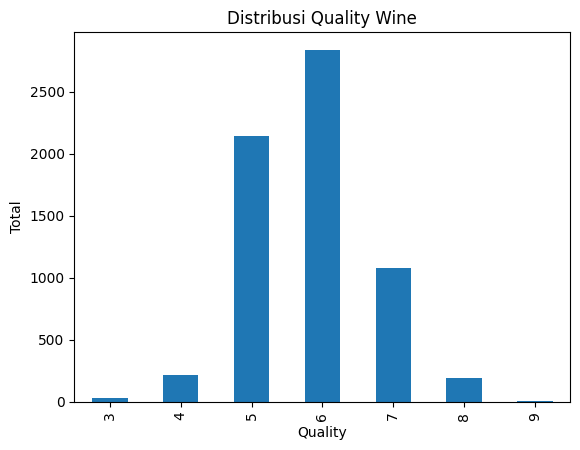

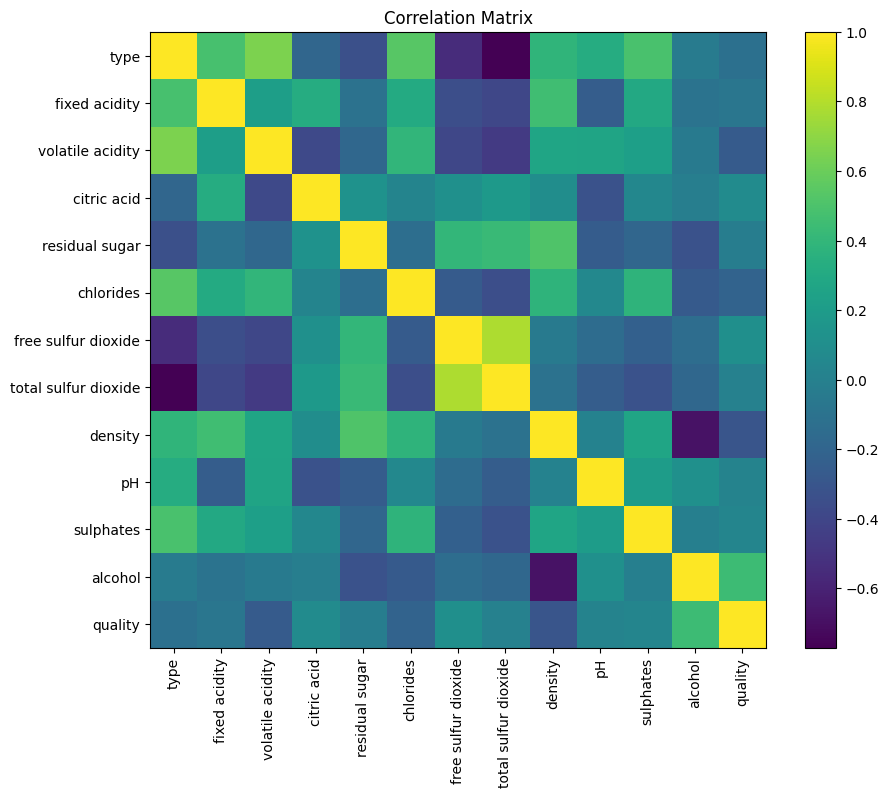

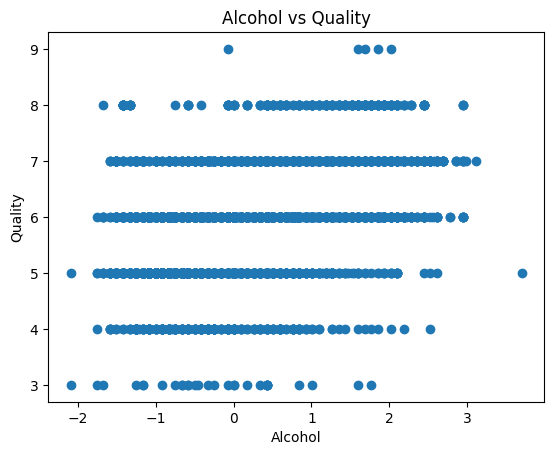

Skewness:
type                    1.179095
fixed acidity           1.724785
volatile acidity        1.497263
citric acid             0.473224
residual sugar          0.414781
chlorides               4.485291
free sulfur dioxide    -0.721434
total sulfur dioxide   -1.350357
density                 0.503602
pH                      0.387449
sulphates               1.100063
alcohol                 0.565718
quality                 0.189623
dtype: float64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Load dataset
df = pd.read_csv("winequality_preprocessed.csv")

# Show Head
print(df.head())

# Print Table Size & Type
print("Shape:", df.shape)
df.info()

# Data Checking
print(df.isnull().sum())
df.describe()
df['type'].value_counts().plot(kind='bar')
plt.title("Distribusi Tipe Wine")
plt.xlabel("Type")
plt.ylabel("Jumlah")
plt.show()

numerical_cols = df.select_dtypes(include='number').columns

for col in numerical_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

for col in numerical_cols:
    plt.figure()
    plt.boxplot(df[col], vert=False)
    plt.title(f"Boxplot {col}")
    plt.xlabel(col)
    plt.show()

df['quality'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribusi Quality Wine")
plt.xlabel("Quality")
plt.ylabel("Total")
plt.show()

corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()

plt.scatter(df['alcohol'], df['quality'])
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.title("Alcohol vs Quality")
plt.show()

print("Skewness:")
print(df[numerical_cols].skew())

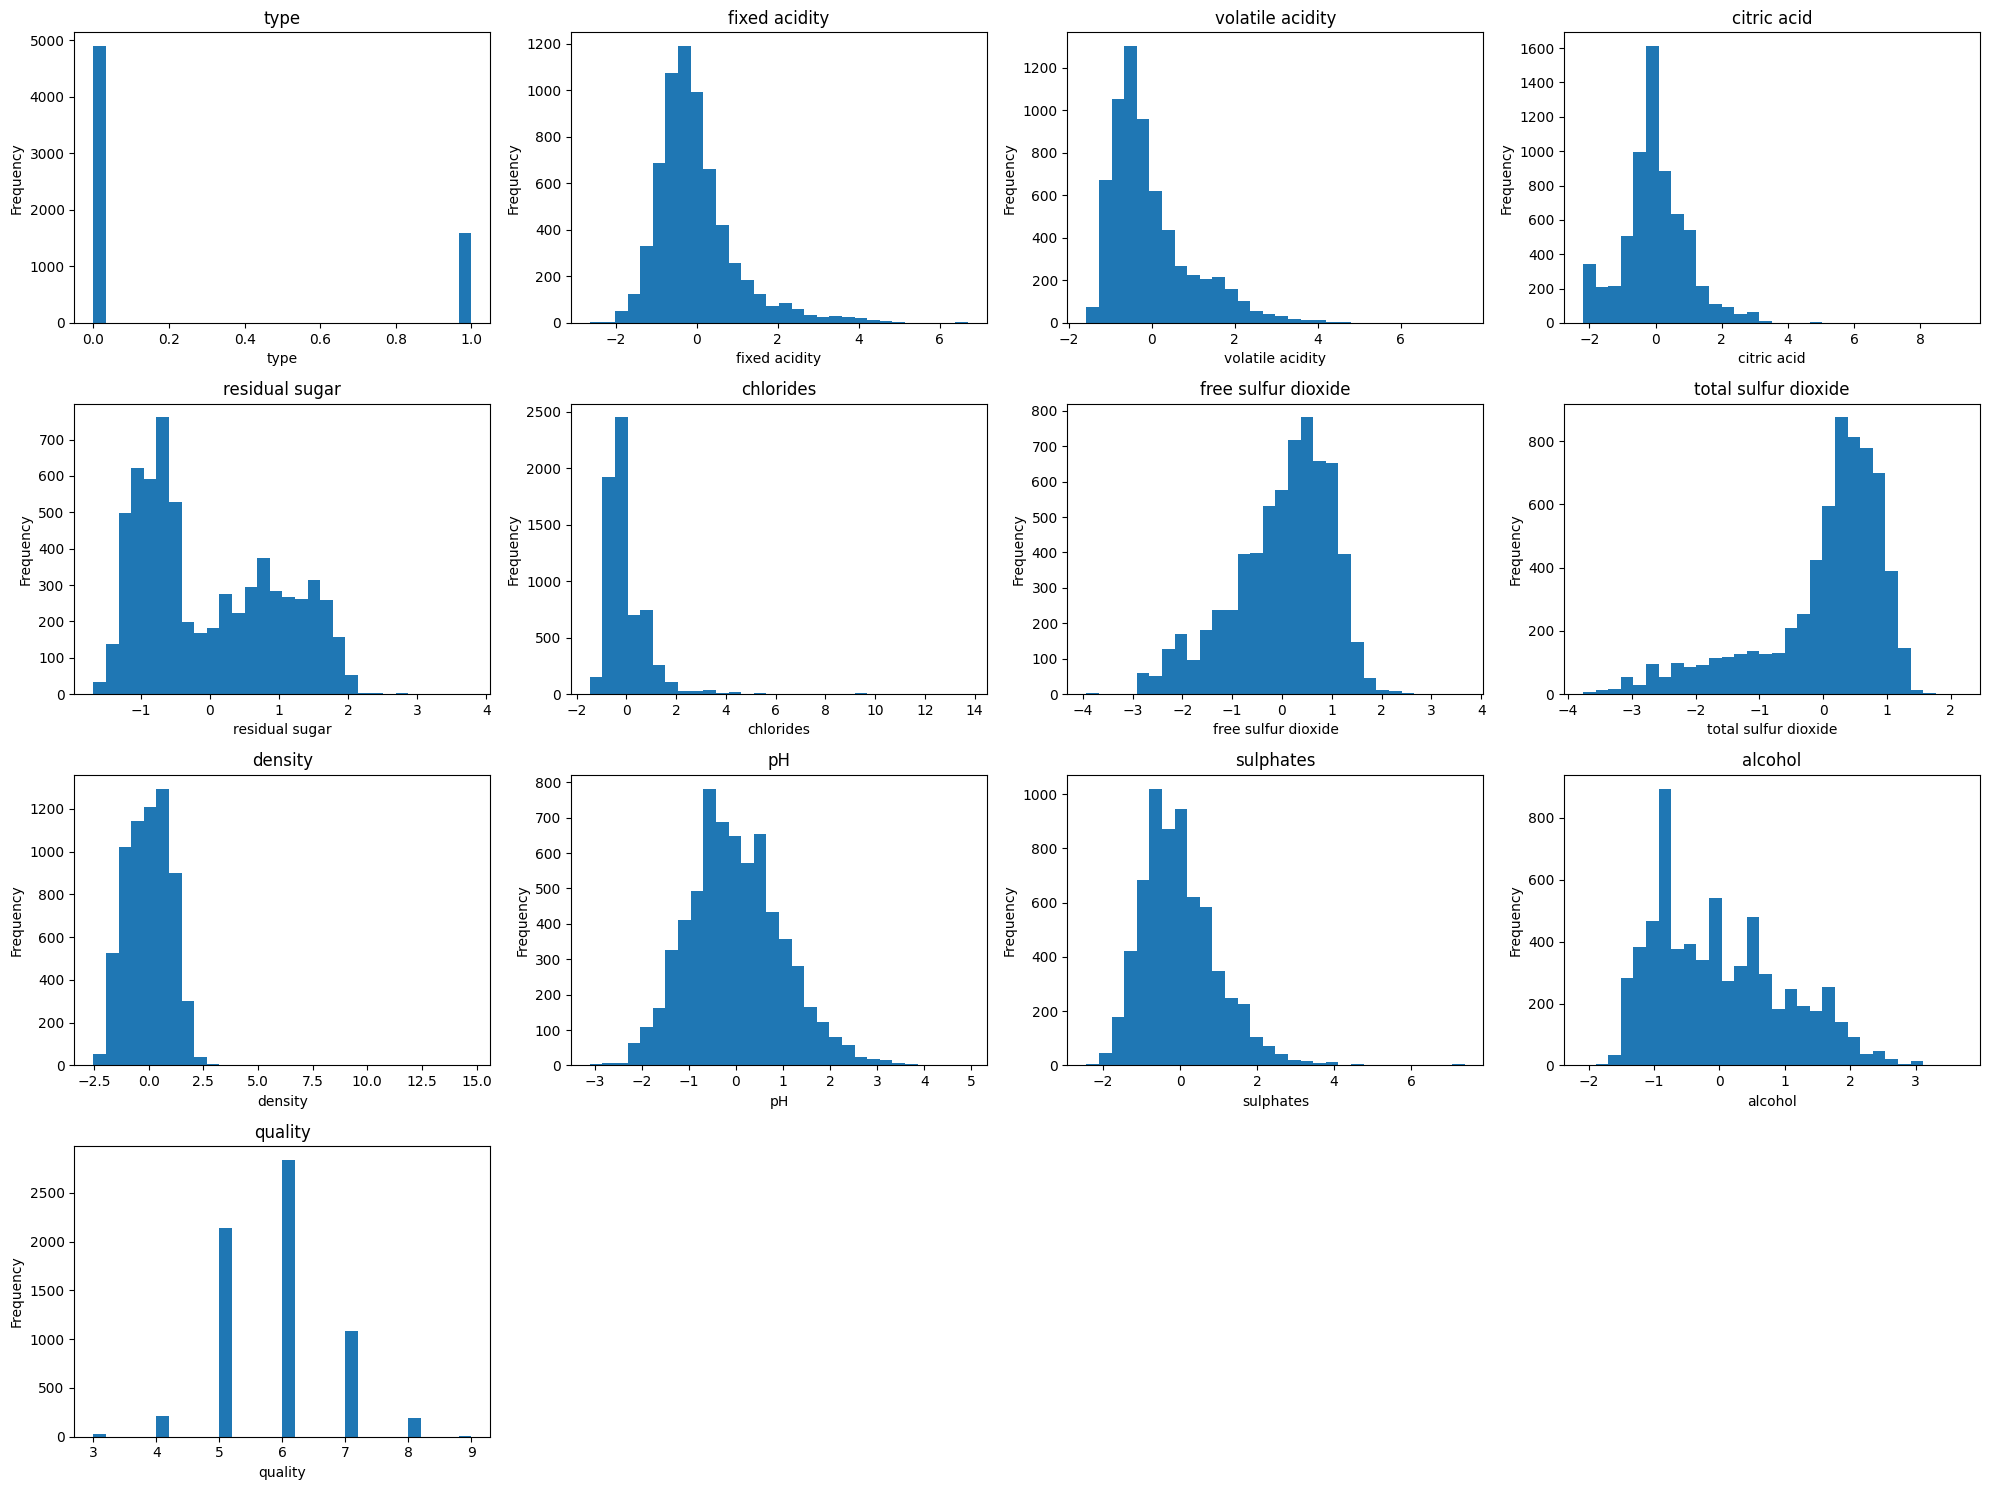

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math

df = pd.read_csv("winequality_preprocessed.csv")

numerical_cols = df.select_dtypes(include='number').columns
n_features = len(numerical_cols)

n_cols = 4
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=30)
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

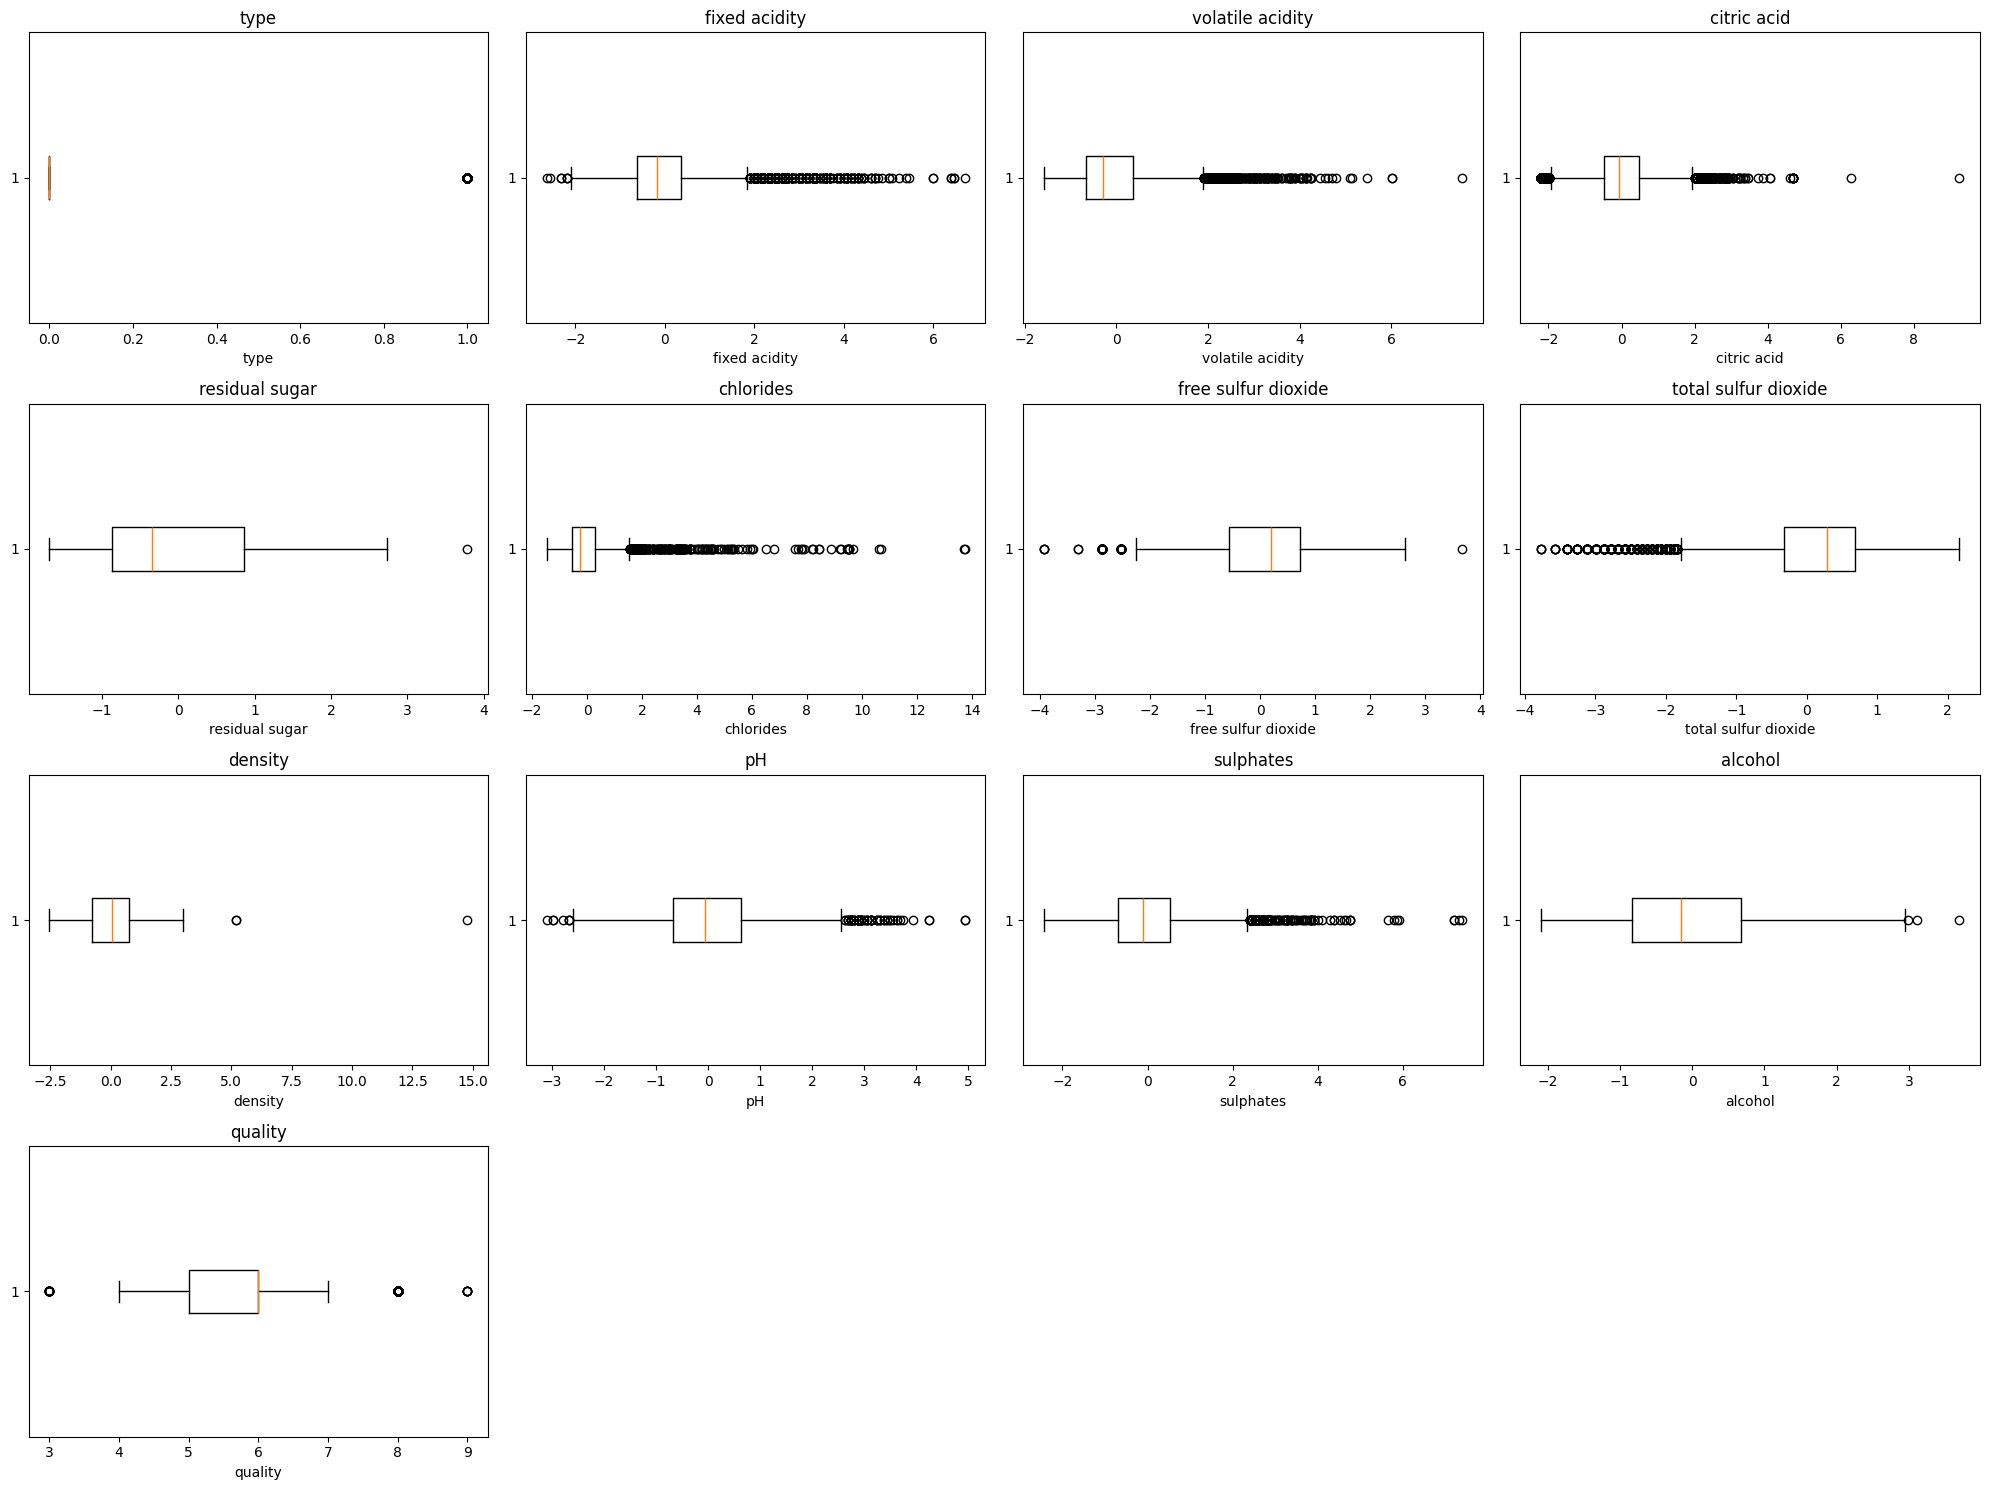

In [3]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df[col], vert=False)
    axes[i].set_title(col)
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

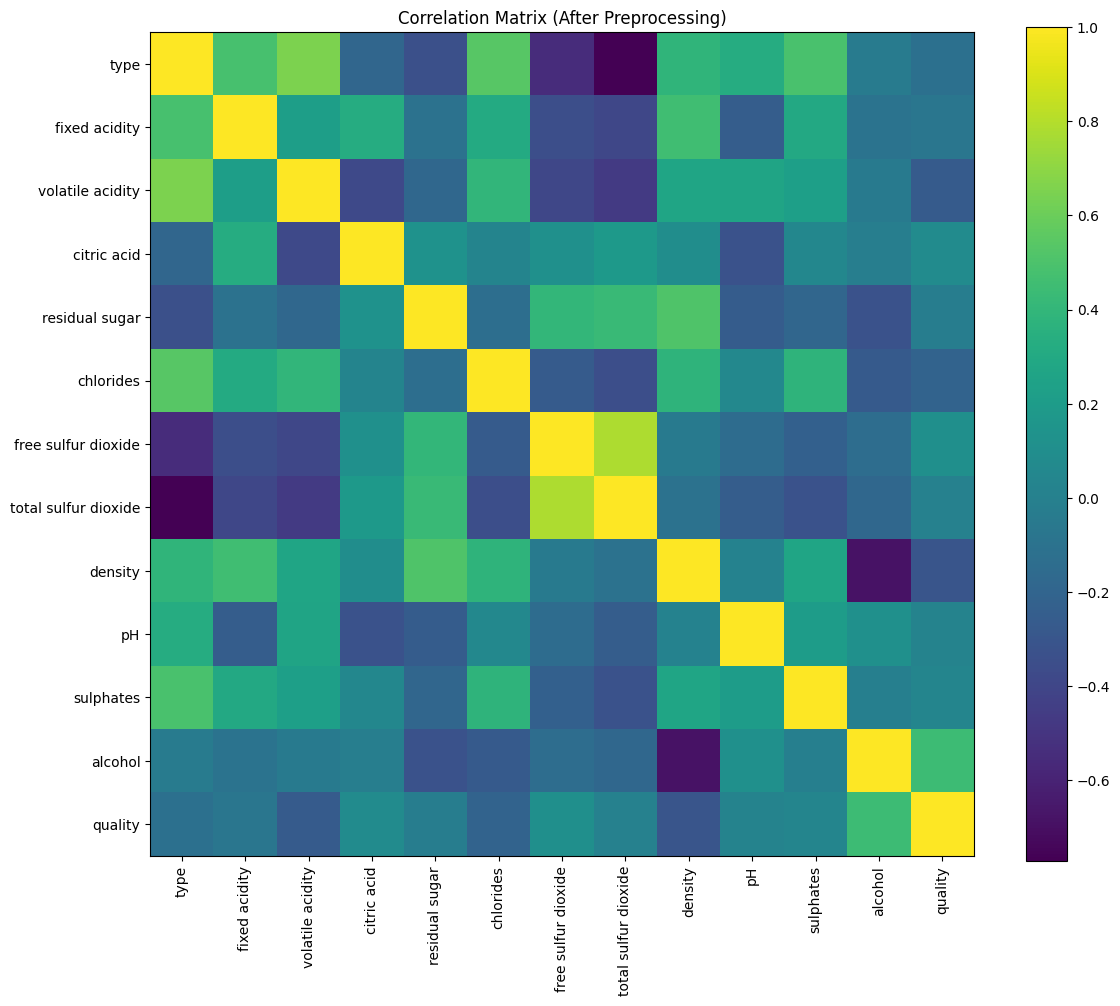

In [4]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix (After Preprocessing)")
plt.tight_layout()
plt.show()